In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [2]:
! git clone https://github.com/ugurarabaci/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 20.16 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os 
dosya_konumu= '/content/datasets/Data'
train_konumu= os.path.join(dosya_konumu, 'train')
test_konumu= os.path.join(dosya_konumu, 'test')
train_covid_konumu= os.path.join(train_konumu, 'COVID19')
train_normal_konumu= os.path.join(train_konumu, 'NORMAL')
test_covid_konumu= os.path.join(test_konumu, 'COVID19')
test_normal_konumu= os.path.join(test_konumu, 'NORMAL')


In [4]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True)

validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_konumu ,
                                                  target_size=(224,224),
                                                  subset='training',
                                                  batch_size=32,
                                                  class_mode= 'binary')


validation_generator=train_datagen.flow_from_directory(train_konumu ,
                                                  target_size=(224,224),
                                                  subset='validation',
                                                  batch_size=32,
                                                  class_mode= 'binary')


test_generator=test_datagen.flow_from_directory(test_konumu ,
                                                  target_size=(224,224),
                                                  batch_size=1,
                                                  class_mode= 'binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [7]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers

model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [8]:
history = model.fit(train_generator,
steps_per_epoch=8,
epochs=15,
verbose=1,
validation_data = validation_generator,
validation_steps=8)

Epoch 1/15
8/8 [==============================] - 41s 5s/step - loss: 1.3756 - accuracy: 0.6259 - val_loss: 0.0991 - val_accuracy: 0.9688
Epoch 2/15
8/8 [==============================] - 33s 4s/step - loss: 0.0799 - accuracy: 0.9652 - val_loss: 0.0827 - val_accuracy: 0.9688
Epoch 3/15
8/8 [==============================] - 35s 5s/step - loss: 0.0662 - accuracy: 0.9723 - val_loss: 0.1273 - val_accuracy: 0.9453
Epoch 4/15
8/8 [==============================] - 33s 4s/step - loss: 0.1033 - accuracy: 0.9560 - val_loss: 0.1092 - val_accuracy: 0.9531
Epoch 5/15
8/8 [==============================] - 33s 4s/step - loss: 0.0364 - accuracy: 0.9837 - val_loss: 0.2301 - val_accuracy: 0.9180
Epoch 6/15
8/8 [==============================] - 34s 4s/step - loss: 0.2772 - accuracy: 0.9151 - val_loss: 0.0654 - val_accuracy: 0.9727
Epoch 7/15
8/8 [==============================] - 35s 5s/step - loss: 0.0435 - accuracy: 0.9817 - val_loss: 0.0405 - val_accuracy: 0.9883
Epoch 8/15
8/8 [==================

In [9]:
model.evaluate(validation_generator)


12/12 [==============================] - 22s 2s/step - loss: 0.1005 - accuracy: 0.9475


[0.10048604756593704, 0.9475138187408447]

In [10]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

12/12 [==============================] - 23s 2s/step


In [11]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [12]:
roc_auc = auc(fpr, tpr)

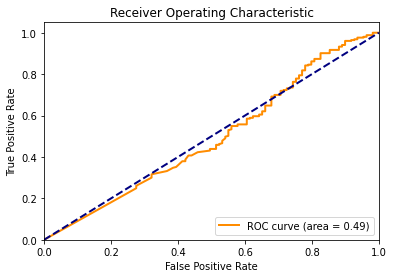

In [13]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.39      0.93      0.55       167
           1       0.86      0.22      0.35       317

    accuracy                           0.46       484
   macro avg       0.62      0.58      0.45       484
weighted avg       0.70      0.46      0.42       484



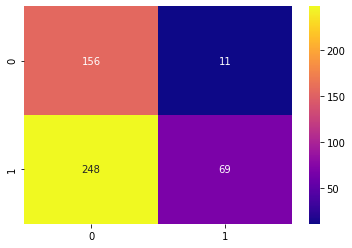

In [29]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array


y_actual =[]
y_test =[]
 
for i in os.listdir("/content/datasets/Data/test/COVID19"):
  img = image.load_img("/content/datasets/Data/test/COVID19/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)
 
 
for i in os.listdir("/content/datasets/Data/test/NORMAL"):
  img = image.load_img("/content/datasets/Data/test/NORMAL/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)
 
 
y_actual = np.array(y_actual)
y_test = np.array(y_test)
 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
 
import seaborn as sns
sns.heatmap(cm,cmap='plasma',fmt="d",annot=True)
 
from sklearn import metrics
print(metrics.classification_report(y_actual,y_test))